In [31]:
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import pandas as pd
import os

In [7]:
print(cv2.__version__)

4.9.0


In [11]:
# Read the image
image = cv2.imread('/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/JPEGImages/000007.jpg')


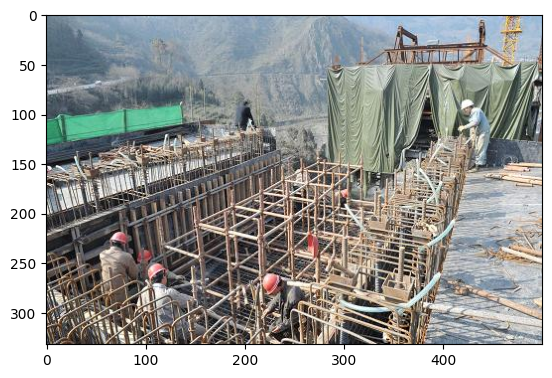

In [16]:
# Convert image from BGR to RGB
img2 = image[:,:,::-1]
# Show image using Matplotlib as cv2.imshow will cause jupyter kernel crashed.
plt.imshow(img2)

In [20]:
# Display Image
cv2.imshow('Original Image',image)
cv2.waitKey(0)

error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [22]:
def draw_rectangles_from_xml(image_path, xml_path):
    """
    Draws rectangles on an image based on the bounding box coordinates in an XML file.
    Args:
        image_path (str): Path to the image file.
        xml_path (str): Path to the XML file containing the bounding box coordinates.
    Returns:
        numpy.ndarray: The image with rectangles drawn on it.
    """
    # Load the image
    image = cv2.imread(image_path)
    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    # Iterate over the bounding boxes in the XML file
    for obj in root.findall('object'):
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        # Draw the rectangle on the image
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    return image

In [23]:
src_img_path = '/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/JPEGImages'
src_label_path = '/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/Annotations'

In [34]:
def create_dataframe_from_jpg_and_xml(jpg_directory, xml_directory):
    """
    Creates a pandas DataFrame containing all .jpg files in the specified directory and their corresponding .xml file contents.

    Parameters:
    - jpg_directory (str): Path to the directory containing .jpg files.
    - xml_directory (str): Path to the directory containing .xml files.

    Returns:
    - DataFrame: A pandas DataFrame with two columns 'filename' and 'xml_content'.
    """
    # List to store file names and xml contents
    data = []

    # Iterate through the .jpg directory
    for filename in os.listdir(jpg_directory):
        # Check if the file is a .jpg
        if filename.lower().endswith('.jpg'):
            # Extract the base name without extension
            base_name = os.path.splitext(filename)[0]

            # Construct the corresponding .xml file path
            xml_file_path = os.path.join(xml_directory, base_name + '.xml')

            # Initialize xml content
            xml_content = None

            # Check if the corresponding .xml file exists
            if os.path.exists(xml_file_path):
                with open(xml_file_path, 'r') as file:
                    xml_content = file.read()

            # Append the file name and xml content to the list
            data.append((filename, xml_content))

    # Create a pandas DataFrame
    df = pd.DataFrame(data, columns=['filename', 'xml_content'])

    return df

In [42]:
def create_dataframe_with_file_paths(directory):
    """
    Creates a pandas DataFrame containing the paths of all files in the specified directory.

    Parameters:
    - directory (str): Path to the directory containing files.

    Returns:
    - DataFrame: A pandas DataFrame with one column 'file_path' listing all file paths.
    """
    # List to store file paths
    file_paths = []

    # Iterate through the directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Construct the full file path
            file_path = os.path.join(root, filename)
            # Append the file path to the list
            file_paths.append(file_path)

    # Create a pandas DataFrame
    df = pd.DataFrame(file_paths, columns=['file_path'])

    return df


In [62]:
df_img=  create_dataframe_with_file_paths(src_img_path)
df_xml = create_dataframe_with_file_paths(src_label_path)

df_img1= df_img.head()
df_xml1 = df_xml.head()

In [79]:
for x in df_xml1['file_path']:
    print(x)

/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/Annotations/PartB_01803.xml
/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/Annotations/001043.xml
/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/Annotations/PartA_01522.xml:Zone.Identifier
/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/Annotations/001400.xml:Zone.Identifier
/home/karush/code/karushp/project-helmet-det/helmet_det/raw_data/VOC2028/Annotations/PartB_00419.xml:Zone.Identifier


In [77]:
type(df_img1['file_path'][0])

str

In [82]:
draw_rectangles_from_xml(df_img1['file_path'][2], df_xml1['file_path'][2])

ParseError: syntax error: line 1, column 0 (<string>)